<a id="start"></a>
# Увеличение выручки интернет-магазина

# Часть 1 Приоритизация гипотез.

In [1]:
pip install matplotlib --upgrade

     |████████████████████████████████| 11.6 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 91.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 88.5 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import figure
import warnings

In [3]:
hypo = pd.read_csv('/datasets/hypothesis.csv')

In [4]:
display(hypo)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
hypo['ICE'] = (hypo['Impact'] * hypo['Confidence']) / hypo['Efforts']

display(hypo.sort_values(by = 'ICE', ascending = False).round(decimals = 1)[['Hypothesis','ICE']])

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


In [6]:
hypo['RICE'] = (hypo['Reach'] * hypo['Impact'] * hypo['Confidence']) / hypo['Efforts']

display(hypo.sort_values(by = 'RICE', ascending = False)[['Hypothesis','RICE']])

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Приоритезация у ICE и RICE разная, так как во втором случае учитывается охват аудитории. Таким образом гипотеза с наибольшим охватом вышла на первое место, а лидер ICE оказался с наименьшим охватом и стал лишь пятым.

# Часть 2 Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.\
Задача - Проанализировать A/B-тест

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [7]:
register_matplotlib_converters()

In [8]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')

display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
visitors = pd.read_csv('/datasets/visitors.csv')

display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [12]:
#Проверка на пропуски и дубликаты
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

print(orders.isna().sum())
print(visitors.isna().sum())

0
0
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


In [13]:
#Проверка количества групп
print(orders['group'].unique())
print(visitors['group'].unique())

['B' 'A']
['A' 'B']


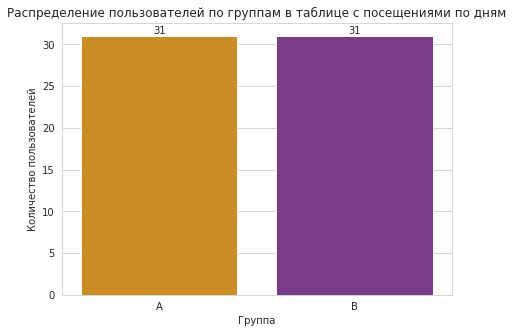

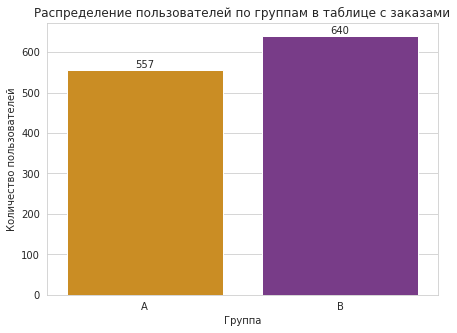

In [14]:
visitorsAB = visitors.pivot_table(index='group', values='visitors', aggfunc='count').reset_index()
visitorsAB.columns = ['Группа','Количество пользователей']

plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')
visitorsplt = sns.barplot(x='Группа', y='Количество пользователей', palette='CMRmap_r', data = visitorsAB)
plt.title('Распределение пользователей по группам в таблице с посещениями по дням')
plt.bar_label(visitorsplt.containers[0])
plt.show(visitorsplt);


ordersAB = orders.groupby('group')['transactionId'].count().rename_axis('group').reset_index()
ordersAB.columns = ['Группа','Количество пользователей']

plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')
ordersplt = sns.barplot(x='Группа', y='Количество пользователей', palette='CMRmap_r', data = ordersAB)
plt.title('Распределение пользователей по группам в таблице с заказами')
plt.bar_label(ordersplt.containers[0])
plt.show(ordersplt);


Распределение пользователей между группами по датам в норме. Распределение пользователей между группами по количеству заказов немного смещено в пользу группы В.

In [15]:
#Проверяю не попали ли какие-либо пользователи в обе группы
usersA = orders[orders['group'] == 'A']
usersB = orders[orders['group'] == 'B']
both_group_users = []
for user in usersA['visitorId']:
    if user in usersB['visitorId']:
        both_group_users.append(user)
display(both_group_users)

[]

In [16]:
display(visitors['date'].min())
display(visitors['date'].max())
display(orders['date'].min())
display(orders['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Тестирование проводилось весь август 2019 года.

In [17]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [20]:
display(datesGroups)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [18]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [19]:
display(ordersAggregated)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [19]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

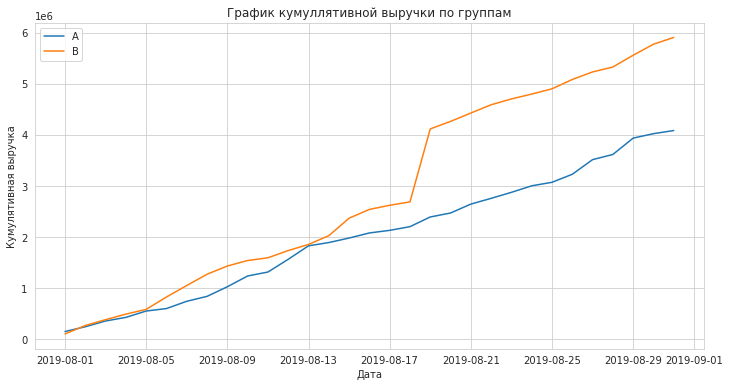

In [20]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders','visitors']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders','visitors']]

plt.figure(figsize=(12, 6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумуллятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')

plt.legend();

Сегмент В в середине тестирования резко вырывается вперед, возможно имели место быть аномально крупные заказы в группе В 19 числа.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

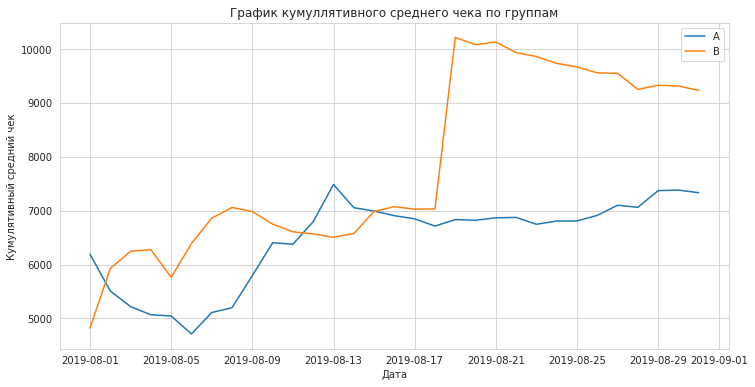

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумуллятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')

plt.legend();

В группе В всё также видны выбросы девятнадцатого августа. Трбуется дополнительный анализ выбросов.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

,date,revenueA,ordersA,visitorsA,revenueB,ordersB,visitorsB
0,2019-08-01,148579,24,719,101217,21,713
1,2019-08-02,242401,44,1338,266748,45,1294
2,2019-08-03,354874,68,1845,380996,61,1803
3,2019-08-04,425699,84,2562,489567,78,2573
4,2019-08-05,549917,109,3318,581995,101,3280


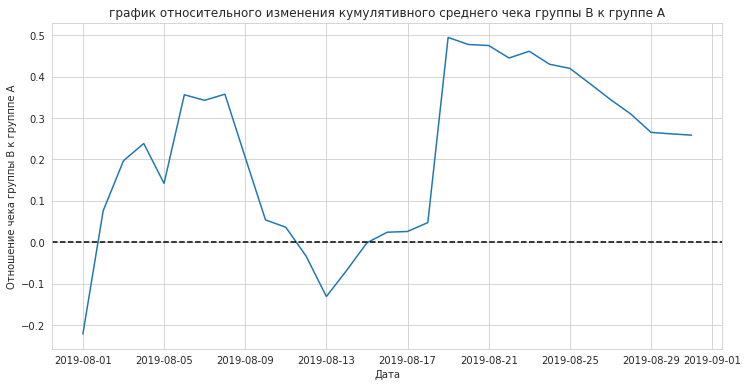

In [22]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

display(mergedCumulativeRevenue.head())

plt.figure(figsize=(12, 6))

plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение чека группы В к групппе А')

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--');

На графике относительного изменения видно выбросы 8 числа в пользу группы А и 19 числа в пользу группы В.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

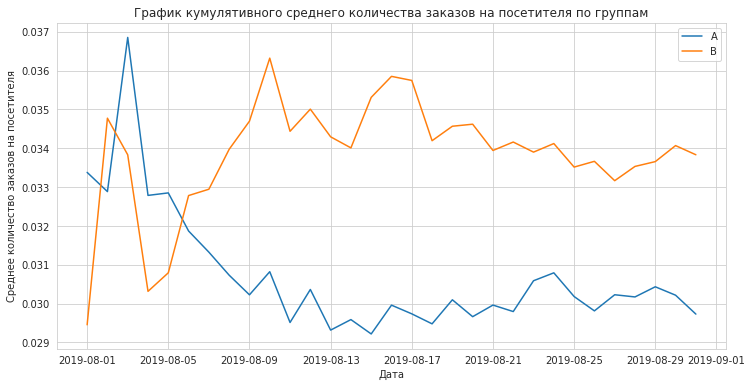

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')

plt.legend();

Наблюдается всплеск заказов в начале измерения, после графики выравниваются и в группе А заказов становится стабильно меньше.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

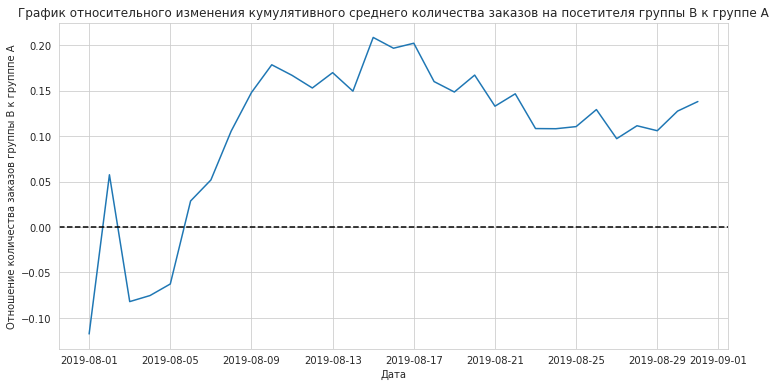

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение количества заказов группы В к групппе А')

plt.axhline(y=0, color='black', linestyle='--');

До 9 числа наблюдается рост заказов в группе В, после чего график стабилизируется и резких скачков не наблюдается. Резкие скачки 8 и 19 числа сдесь не наблюдаются, значит дело не в количестве заказов а в стоимости некоторых отдельных заказов.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

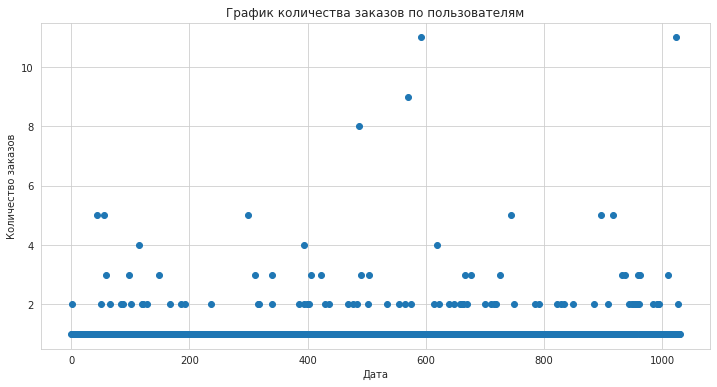

In [25]:
ordersperuser = orders.pivot_table(index='visitorId', values='transactionId', aggfunc='count').reset_index()
ordersperuser.columns = ['visitorId','count']
x_values = pd.Series(range(0,len(ordersperuser['visitorId'])))
plt.figure(figsize=(12, 6))
plt.title('График количества заказов по пользователям')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersperuser['count']);

На графике видно, что имеется всего два пользователя, у которых количество заказов больше 8.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [26]:
print(np.percentile(ordersperuser['count'], [95, 99]))

[2. 4.]


Не более 1% пользователей совершали больше 4 заказов. И не более 5% больше 2 заказов. Разумно выбрать среднее между ними, а именно 3 заказа как верхнюю границу числа заказов.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


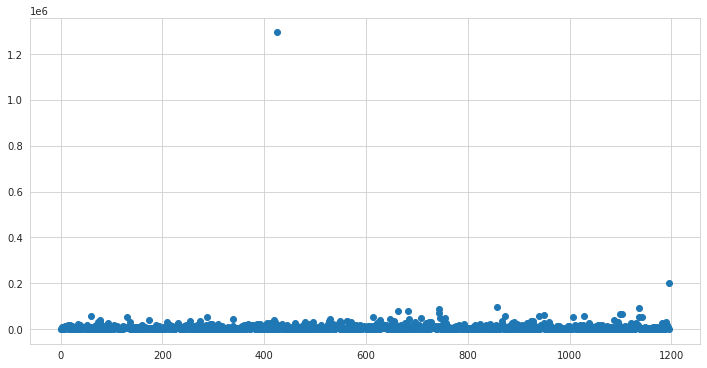

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])

display(orders.sort_values(by = 'revenue', ascending = False).head());

Два заказа, за миллион триста тысяч рублей и двести тысяч рублей сильно выбиваются из общей массы. Вероятно они и создают выбросы. Ко всему прочему, видно что самый дорогой заказ как раз был 19 числа.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [28]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


95% всех заказов было на сумму менее 28 тысяч рублей. Это число и будет верхней границей. Остальное отсеем.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Гипотезы:

    H0: Статистически значимых различий в среднем числе заказов между группами нет.
    H1: Имеются статистически значимые различия в среднем числе заказов между группами.


In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = (
    orders[orders['group'] == 'A'][['transactionId', 'visitorId', 'date', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['transactionId', 'visitorId', 'date', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {0}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Разница между средним: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))



p-value: 0.016792355056752608
Разница между средним: 0.138


P-value меньше 0.05, значит исходя из сырых данных между группами есть статистически значимые различия. Однако среднее группы В на 14% большего среднего группы А

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Гипотезы:

    H0: Статистически значимых различий в среднем чеке заказа между группами нет.
    H1: Имеются статистически значимые различия в среднем чеке заказа между группами.


In [30]:
print('p-value: {0}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Разница между средним: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.7292909855432458
Разница между средним: 0.259


P-value значительно больше 0.05 - значит принимаем нулевую гипотезу. Однако средний чек группы В на 26% больше чем у группы А. 

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Гипотезы:

    H0: Статистически значимых различий в среднем количестве заказов после очистки данных между группами нет.
    H1: Статистически значимые различия между группами в среднем количестве заказов после очистки данных остаются.


In [31]:
max_revenue = 28000
max_orders = 3

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > max_orders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > max_orders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))#Список пользователей у которых больше 3 заказов и/или есть заказы стоимостью более 28000.

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64


In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value: {0}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Разница между средним: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.017942888591552505
Разница между средним: 0.148


P-value и среднее почти не изменились, даже после обработки данных между группами остаются статистически значимые различия. А значит конверсия группы В на 15% лучше чем А. Принимаем альтернативную гипотезу.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Гипотезы:

    H0: Статистически значимых различий в среднем чеке заказа после очистки данных между группами нет.
    H1: Статистически значимые различия между группами в среднем чеке заказа после очистки данных остаются .


In [34]:
print(
    'p-value: {0}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Разница между средним: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.9765292921254219
Разница между средним: -0.017


p-value увеличилось с 73% до 98% а различие групп уменьшилось с 26% до 2%. Статистически значимого различия между группами по сумме среднего чека нет. Следовательно график в в пункте 5 достоверен. Оставляем нулевую гипотезу.

### Примите решение по результатам теста и объясните его.

Мною принято решение остановить тест и признать победу группы В по следующим причинам:
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий в пользу группы В.
- Отсутствует статистически значимое различие по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий.
- График различия конверсии между группами стабилизировался в районе отметки в 15% в пользу группы В значит тест можно прекратить.
- График среднего чека сильно колеблется из-за аномалий, но даже после их обработки статистически значимого различия между группами нет, поэтому сделать выводы из этого графика нельзя.

[В начало](#start)